# PHYS 541 Assignment 5 Question 2

Snakes and Ladders, again!

a)	Implement in the snakes and ladders Markov Chain prediction (100 squares) the often adopted rule that in order to “win’ the game, that you have to land EXACTLY on the final square (i.e. if you roll a number that is larger than the required number to land on the final square, you remain where you are).  These curves (Probability vs. N_rolls) for the “no snakes and ladders” and “with snakes and ladders” cases will represent a sort of “theory” that we can compare an actual simulation to.

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

[[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667 0.         0.         0.         0.         0.        ]
 [0.         0.         0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667 0.16666667 0.         0.         0.         0.        ]
 [0.         0.         0.         0.16666667 0.16666667 0.16666667
  0.16666667 0.16666667 0.16666667 0.         0.         0.        ]
 [0.         0.         0.         0.         0.16666667 0.16666667
  0.16666667 0.16666667 0.16666667 0.16666667 0.         0.        ]
 [0.         0.         0.         0.         0.         0.16666667
  0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]]
[[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.16666667
  0.16666667]
 [0.         0.         0.16666667 0.16666667 0.16666667 0.16666667
  0.33333333]
 [0.         0.      

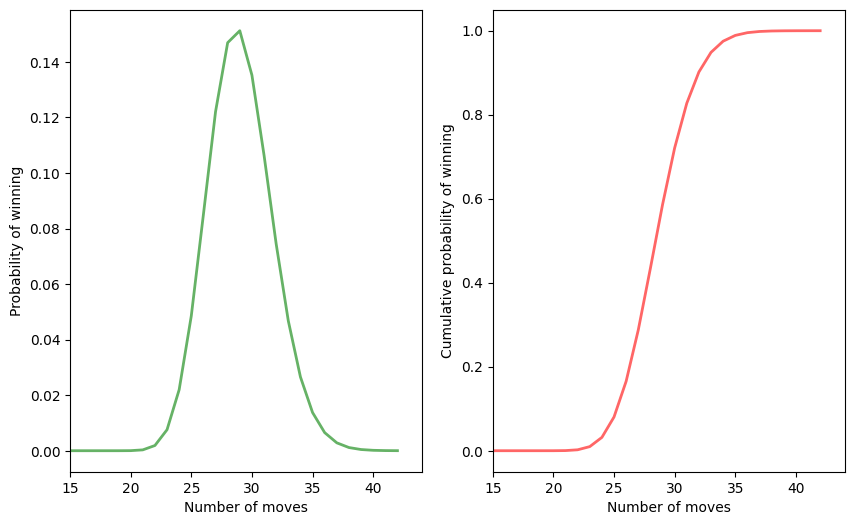

In [4]:
# Set up the transition matrix
T = np.zeros((101, 101))
for i in range(1,101):
    T[i-1,i:i+6] = 1/6

# House rules: you don't need to land on 100, just reach it.
T[95:100,100] += np.linspace(1/6, 5/6, 5)

print(T[0:6,0:12])
print(T[94:100,94:101])

# The player starts at position 0.
v = np.zeros(101)
v[0] = 1

n, P, C = 0, [], []
cumulative_prob = 0
# Update the state vector v until the cumulative probability of winning
# is "effectively" 1
while cumulative_prob < 0.99999:
    n += 1
    v = v.dot(T)
    P.append(v[100])
    cumulative_prob += P[-1]
    C.append(cumulative_prob)
    
mode = np.argmax(P)+1
print('modal number of moves:', mode)

# Plot the probability of winning as a function of the number of moves
plt.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots(1,2)
ax[0].plot(np.linspace(1,n,n), P, 'g', lw=2, alpha=0.6)
ax[0].set_xlim(15)
ax[0].set_xlabel('Number of moves')
ax[0].set_ylabel('Probability of winning')
ax[1].plot(np.linspace(1,n,n), C, 'r', lw=2, alpha=0.6)
ax[1].set_xlim(15)
ax[1].set_xlabel('Number of moves')
ax[1].set_ylabel('Cumulative probability of winning')


plt.show()